<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Accessing-the-data" data-toc-modified-id="Accessing-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Accessing the data</a></span></li><li><span><a href="#Questions-addressed-in-this-notebook" data-toc-modified-id="Questions-addressed-in-this-notebook-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Questions addressed in this notebook</a></span></li><li><span><a href="#How-the-raw-data-is-generated" data-toc-modified-id="How-the-raw-data-is-generated-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>How the raw data is generated</a></span></li><li><span><a href="#Why-the-S-unit-generators-are-not-listed" data-toc-modified-id="Why-the-S-unit-generators-are-not-listed-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Why the S-unit generators are not listed</a></span></li><li><span><a href="#Why-the-data-is-processed-this-way" data-toc-modified-id="Why-the-data-is-processed-this-way-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Why the data is processed this way</a></span></li><li><span><a href="#Future-to-do-items" data-toc-modified-id="Future-to-do-items-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Future to-do items</a></span></li></ul></li><li><span><a href="#Packages-and-setup" data-toc-modified-id="Packages-and-setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Packages and setup</a></span></li><li><span><a href="#Overview-of-all-data" data-toc-modified-id="Overview-of-all-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Overview of all data</a></span><ul class="toc-item"><li><span><a href="#All-S-unit-data" data-toc-modified-id="All-S-unit-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>All S-unit data</a></span></li><li><span><a href="#Data-for-forms-where-no-S-unit-equations-are-possible" data-toc-modified-id="Data-for-forms-where-no-S-unit-equations-are-possible-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data for forms where no S-unit equations are possible</a></span></li><li><span><a href="#Data-for-forms-where-no-S-unit-equations-are-needed" data-toc-modified-id="Data-for-forms-where-no-S-unit-equations-are-needed-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Data for forms where no S-unit equations are needed</a></span></li><li><span><a href="#Thue-equation-data" data-toc-modified-id="Thue-equation-data-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Thue equation data</a></span></li></ul></li><li><span><a href="#Class-number" data-toc-modified-id="Class-number-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Class number</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-class-numbers" data-toc-modified-id="Distribution-of-class-numbers-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Distribution of class numbers</a></span></li><li><span><a href="#Average-time-to-generate-the-class-group" data-toc-modified-id="Average-time-to-generate-the-class-group-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Average time to generate the class group</a></span></li></ul></li><li><span><a href="#Fundamental-units" data-toc-modified-id="Fundamental-units-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fundamental units</a></span></li><li><span><a href="#S-unit-rank" data-toc-modified-id="S-unit-rank-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>S-unit rank</a></span><ul class="toc-item"><li><span><a href="#Overview-of-S-unit-rank-frequency" data-toc-modified-id="Overview-of-S-unit-rank-frequency-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Overview of S-unit rank frequency</a></span></li><li><span><a href="#Number-of-S-unit-equations" data-toc-modified-id="Number-of-S-unit-equations-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Number of S-unit equations</a></span></li><li><span><a href="#Distribution-of-ranks" data-toc-modified-id="Distribution-of-ranks-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Distribution of ranks</a></span></li><li><span><a href="#Average-time-to-generate-S-unit-equations" data-toc-modified-id="Average-time-to-generate-S-unit-equations-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Average time to generate S-unit equations</a></span></li></ul></li></ul></div>

# Introduction

This notebook aims to analyze the S-unit equation data generated from the Thue-Mahler forms of absolute discriminant up to $10^6$. This data is generated in MAGMA and periodically updated onto dropbox. 

## Accessing the data

The raw data is available on dropbox, under the directory ThueMahler/Data/SUnitEqData. This data is also backed up on several private repos, which I update periodically as the code runs.

## Questions addressed in this notebook

* Class number and class group:
    * Which class number occurs most frequently?
    * What is the largest class number we should expect to see?
    * What is the distribution of class number vs conductor?
    * How long does the average class group take to generate?  
             
       
* Fundamental units:
    * What percentage of the data has $r = 1$ vs $r = 2$?  
               
        
* S-unit rank:
    * How many S-unit equations must be solved?
    * Which rank number occurs the most frequently?
    * What is the distribution of rank vs conductor?
    * How many S-unit equations does each Thue-Mahler form lead to, on average?
    * How long does the average S-unit equation take to generate?
    * Does computation time of S-unit equations increase with the conductor, $N$?
    * What is the most time-consuming part of generating an S-unit equation?


## How the raw data is generated

The algorithm takes, as its input, the conductor and corresponding Thue-Mahler form of absolute discriminant up to $10^6$. Recall, we aim to solve 
$$ F(u,v) = a p_1^{n_1} \cdots p_v^{n_v}, $$
where
$$ F(u,v) = c_0 u^3 + c_1 u^2 v + c_2 u v^2 + c_3 v^3. $$
1. The algorithm begins by verifying any possible obstructions, ruling out any forms for which no S-unit equations are possible. 
2. For those forms without local obstructions, we test several $GL_2(\mathbb{Z})$ actions on the Thue-Mahler form to determine the optimal form to proceed with. These $GL_2(\mathbb{Z})$ actions are selected by solving the Thue-equation $F(a,c) = x$ for $x \in \{1,\dots,20\} \cup \{p : p \text{ rational prime } \le 200 \}$. We use the resulting solutions $a,c$ to determine $b,d$ and therefore the resulting $GL_2(\mathbb{Z})$ action. Under this action, $c_0$ becomes $x$: $$ F(au+bv,cu+dv) = x u^3 + d_1 u^2 v + d_2 u v^2 + d_3 v^3 $$ for some integers $d_1,d_2,d_3$. For each such action, we generate all S-unit equations as outlined below, and choose the action and Thue-Mahler form leading to the least S-unit equations. The reasoning behind our choice of $GL_2(\mathbb{Z})$ actions is as follows. The Thue-Mahler solver only generates those solutions having $(v,c_0) = 1$. However, the solutions with $(v,c_0) \neq 1$ lead to relevant elliptic curves. To account for these solutions, if $c_0 \neq 1$, we are forced to apply several linear changes of variables to obtain a family of equations of the form
$$F(u,v) = u^3 + e_1 u^2 v + e_2 u v^2 + e_3 v^3 = a_ip_1^{n_1} \cdots p_v^{n_v}$$ for some integers $e_1,e_2,e_3$, where the constant $a_i$ varies over all such equations depending on $c_0$. If one can find an action which forces $c_0 = 1$, then we have only one possible $a_i$ value to contend with. If this is not possible, our next best choice is to force $c_0$ to have as few divisors as possible. ** We note here that the total number of S-unit equations counts all S-unit equations as we vary over all possible $a_i$**.
3. Having selected an optimal Thue-Mahler form, we then use the theorem of Bennett-G.-Rechnitzer to determine any bounds on the exponents $n_i$ of the primes $p_i \in \{p_1, \dots, p_v\}$. The exponents we are able to explicitly determine are pushed into the constant $a$ with their corresponding prime base. That is, if we know that $n_i$ can only take on the values among $\{l,m\}$, we redefine two possibilities for $a$ as follows: either $a = ap_i^{l}$, or $a = ap_2^m$. We then generate all possible combinations of these initial prime bounds and $a$ values, listing, for each case, the primes $\{p_1, \dots, p_v\}$ whose exponents we do not know, and the corresponding constant, $a$. 
4. At this point, it may be possible that some cases do not have any primes whose exponents we do not know. In this case, we are left to solve the Thue equation $$ F(u,v) = a. $$ We store this information in the file ThueEqToSolve.csv and remove these cases from our list.
5. For each remaining element of the list, we generate all corresponding ideal equations, invoking the new and improved Prime Ideal Removing Lemma. 
6. From each ideal equation, we generate all corresponding S-unit equations.

Throughout this process, we remove any resulting Thue equations from the list and store them in ThueEqToSolve.csv. The output is printed among the files 
* SUnitErr.txt
    * Tracks any errors in the code that may arise. Thus far, no errors have been reported.
* NoSUnitEqPossible.csv
    * This file lists the conductors and corresponding Thue-Mahler forms for which no S-unit equations are possible due to obstructions.
* NoSUnitEqNeeded.csv
    * Lists the forms which either reduce to Thue equations or which do not yield any S-unit equations.
* ThueEqToSolve.csv
    * Lists all Thue equations remaining to be solved.
* TMFormData.csv
    * Lists all corresponding relevant data for generating S-unit equations.
    
## Why the S-unit generators are not listed

MAGMA, it seems, does not do a great job of restoring data previously calculated. I've tried to store the S-unit equations in a file and recreate the environment in a new MAGMA session, but the result is finicky at best; MAGMA claims that the elements are not compatible with each other, or in some cases, are not even the same elements that I stored! Probably there is a way to work around this, but storage becomes a problem at that point. In either case, I've omitted trying to do this, since reading in all the generators and then forcing them into the same field seems more like a headache than just recalculating the fields and their elements. 

## Why the data is processed this way

Probably everything here can be done far more efficiently by a data analyst and someone more familiar with Python than I am. I've learned this all on the fly in about a week. **If there is a better way to look at some of this data, please let me know.**

## Future to-do items

As the data grows, using `pandas` might become cumbersome and slow. At that point, we might have to switch to either using `dask` or using only a subset of all of the data. 

Other questions we should consider:

* Number fields:
    * How many unique number fields are there?
    * Is there any overlap of fields between Thue-Mahler equations?
       
       
* Thue equations:
    * Is there any overlap of Thue equations?
    * How many Thue equations must be solved, taking into account any overlap?
    * What is the average size of the right-hand side of a Thue equation?
    
       
* Obstructions:
    * How many Thue-Mahler equations can be ruled out by local obstructions?
    * What is the distribution of local obstructions over the conductor?
    * How many Thue-Mahler equations yield partial obstructions?
    * What, on average, is the partial obstruction observed?

# Packages and setup

By default, this notebook will be saved in the same directory on dropbox as the data files, ThueMahler/Data/SUnitEqData. If all works correctly in this notebook, you should not need to edit the file path names to load the data here.

In [1]:
# import the relevant packages and define any relevant functions

import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
from ast import literal_eval

# set dataframe to display 2 decimal places
pd.options.display.float_format = "{:.2f}".format

def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [2]:
# read in data from files
# for speed up of this process, comment out the files you do not plan on analyzing

# TO DO: save this file with the data on dropbox

TM_data = pd.read_csv(
    '/Users/adela016/Documents/Work/Postdoc/ThueMahler/Data/SUnitEqData/TMFormData.csv',index_col=False)

NoSUnitEqPossible_data = pd.read_csv(
    '/Users/adela016/Documents/Work/Postdoc/ThueMahler/Data/SUnitEqData/NoSUnitEqPossible.csv',index_col=False)

NoSUnitEqNeeded_data = pd.read_csv(
    '/Users/adela016/Documents/Work/Postdoc/ThueMahler/Data/SUnitEqData/NoSUnitEqNeeded.csv',index_col=False)

ThueEqToSolve_data = pd.read_csv(
    '/Users/adela016/Documents/Work/Postdoc/ThueMahler/Data/SUnitEqData/ThueEqToSolve.csv',index_col=False)


# Overview of all data

Here, we take a quick glance at all of the data collected so far, as well as some basic analytics for each dataset.

## All S-unit data

Recall that 
$$ F(u,v) = a p_1^{n_1} \cdots p_v^{n_v}, \quad \text{ where } \quad F(u,v) = c_0 u^3 + c_1 u^2 v + c_2 u v^2 + c_3 v^3. $$
The data presented in the dataframe `TM_data` is defined here.
* **N**: The conductor.
* **form**: The coefficients of $F$, $c_0, \dots c_3$, listed as `(c_0,...,c_3)`.
* **optimal form**: The coefficients of $F$, under a $GL_2(\mathbb{Z})$ action, yielding the fewest S-unit equations. These coefficients are listed as `(d_0,...,d_3)` where $$F(u,v) = d_0 u^3 + d_1 u^2 v + d_2 u v^2 + d_3 v^3. $$
* **min poly**: The coefficients of the minimal polynomial of $K = \mathbb{Q}(\theta)$, where $\theta$ is a root of $F(t,1)$.
* **partial obstructions**: The set of primes $p \in \{p_1, \dots, p_v\}$ which can only appear with exponent $0$ in $F(u,v) = a p_1^{n_1} \cdots p_v^{n_v}$.
* **class number**: The class number of $K$.
* **no ideal eq**: The number of ideal equations after applying the (refined) Prime Ideal Removing Lemma.
* **no Thue eq**: The number of Thue equations to be solved. These equations are stored in ThueEqToSolve.csv and are excluded from the S-unit equation computation.
* **no S-unit eq**: The number of S-unit equations to be solved.
* **S-unit ranks**: The ranks of each S-unit equation corresponding to $N$, $F$.
* **local obstruction time**: The CPU time required to verify $N$, $F$ for local obstructions.
* **GL2Z action time**: The CPU time required to determine the $GL_2(\mathbb{Z})$ action and resulting coefficients $(d_0, \dots, d_3)$ yielding the least S-unit equations.
* **class group time**: The CPU time required to determine the class group of $K$.
* **unit group time**: The CPU time required to determine the unit group of $K$.
* **ideal eq time**: The CPU time required to determine all ideal equations and apply the PIRL.
* **Thue eq time**: The CPU time required to determine and remove any Thue equations from the list.
* **S-unit time**: The CPU time required to convert all ideal equations into S-unit equations.
* **bound time**: The CPU time required to determine the large upper bound on the exponents $n_i$.
* **total time**: The total CPU time from the start of the algorithm to the end.

In [3]:
# convert strings into arrays
TM_data['S-unit ranks'] = TM_data['S-unit ranks'].apply(literal_eval)
TM_data['partial obstructions'] = TM_data['partial obstructions'].apply(literal_eval)

print('Largest conductor encountered so far:', TM_data['N'].max())
print('Total number of S-unit equations to solve:', (TM_data['S-unit ranks'].map(len)).sum())

Largest conductor encountered so far: 155591
Total number of S-unit equations to solve: 7624573


In [14]:
# insert a column to generate the number of S-unit equations for each row
idx = 9
new_col = TM_data['S-unit ranks'].map(len)
TM_data.insert(loc=idx, column='no S-unit eq', value=new_col)

display(TM_data.head())
display(TM_data.describe())

# generate the mean, std of all columns over any row having the same conductor, N
TM_data_mean = TM_data.groupby('N').mean().reset_index()
TM_data_std = TM_data.groupby('N').std().reset_index()

# take the mean, std number of the number of S-unit equations per N over every 2500 entries
TM_data_rolling_mean = TM_data.rolling(2500,center=True,win_type=None).mean().dropna()
TM_data_rolling_std = TM_data.rolling(2500,center=True,win_type=None).std().dropna()


,N,form,optimal form,min poly,partial obstructions,class number,r,no ideal eq,no Thue eq,no S-unit eq,S-unit ranks,local obstruction time,GL2Z action time,class group time,unit group time,ideal eq time,Thue eq time,S-unit time,bound time,total time
0,45,"(1,3,3,3)","(1,3,3,3)","(1,3,3,3)",None,1,1,2,0,2,"[2, 2]",0.14,1.51,0.05,0.00,0.00,0.00,0.01,0.00,1.74
1,26,"(2,2,3,1)","(2,2,3,1)","(1,2,6,4)",[3],1,1,3,1,3,"[2, 2, 3]",0.12,1.82,0.04,0.00,0.01,0.00,0.01,0.00,2.01
2,22,"(1,2,2,2)","(1,2,2,2)","(1,2,2,2)",[3],1,1,2,2,2,"[2, 2]",0.20,1.93,0.03,0.00,0.01,0.00,0.00,0.00,2.22
3,18,"(1,0,3,2)","(1,0,3,2)","(1,0,3,2)",None,1,1,1,1,1,[2],0.19,1.95,0.06,0.00,0.01,0.00,0.01,0.00,2.23
4,54,"(1,0,3,2)","(1,0,3,2)","(1,0,3,2)",None,1,1,2,2,2,"[2, 2]",0.13,1.73,0.06,0.01,0.00,0.00,0.01,0.00,1.95


,N,class number,r,no ideal eq,no Thue eq,no S-unit eq,local obstruction time,GL2Z action time,class group time,unit group time,ideal eq time,Thue eq time,S-unit time,bound time,total time
count,596348.00,596348.00,596348.00,596348.00,596348.00,596348.00,596348.00,596348.00,596348.00,596348.00,596348.00,596348.00,596348.00,596348.00,596348.00
mean,83663.56,1.88,1.18,13.59,1.00,12.79,0.41,29.07,0.06,0.01,1.40,0.00,0.04,0.01,31.05
std,43440.37,2.57,0.38,18.25,1.28,17.27,0.33,147.44,0.01,0.01,5.17,0.01,0.06,0.01,148.59
min,11.00,1.00,1.00,1.00,0.00,1.00,0.07,0.26,0.02,0.00,0.00,0.00,0.00,0.00,0.50
25%,47348.00,1.00,1.00,4.00,0.00,4.00,0.12,3.08,0.05,0.00,0.06,0.00,0.01,0.00,3.76
50%,85608.00,1.00,1.00,8.00,0.00,8.00,0.29,5.56,0.05,0.01,0.15,0.00,0.02,0.00,6.37
75%,121338.00,2.00,1.00,15.00,2.00,15.00,0.62,11.70,0.06,0.01,0.55,0.01,0.04,0.01,13.02
max,155591.00,104.00,2.00,924.00,24.00,924.00,9.29,7530.38,0.36,0.04,859.63,0.50,3.89,0.46,7533.75


## Data for forms where no S-unit equations are possible

**Definition**: 
As per the theorem of Bennett-G.-Rechnitzer, if $p \geq 3$ and $\text{ord}_p(N) = 1$, then $p \mid \text{Disc}(F)F(u,v)$. Thus, if $p\nmid \text{Disc}(F)$, then $F(u,v) \equiv 0 \mod{p}$ for some $(u,v)$. If $u \equiv v \equiv 0 \mod{p}$ is the only solution, then $\gcd(u,v) \neq 1$ and hence we obtain a *local obstruction*.

The data presented in the dataframe `NoSUnitEqPossible_data` is defined here.
* **N**: The conductor.
* **form**: The coefficients of $F$, $c_0, \dots c_3$, listed as `(c_0,...,c_3)`.
* **local obstruction**: The prime $p \in \{p_1, \dots, p_v\}$ such that $p \geq 3$ and $\text{ord}_p(N) = 1$, for which $p \nmid Disc(F)$ where $u \equiv v \equiv 0 \mod{p}$ is the only solution to $F(u,v) \equiv 0 \mod p$. Alternatively, this may also indicate $p \leq 151$ for which no solution of the TM equation exists mod $p$. 
* **partial vs BeGhRe**: The prime $p \in \{p_1, \dots, p_v\}$ appearing only with exponent $0$ in $F(u,v) = a p_1^{n_1} \cdots p_v^{n_v}$ which conflicts with the exponent bounds as listed in the theorem of Bennett-G.-Rechnitzer.
* **local obstruction time**: The CPU time required to verify $N$, $F$ for local obstructions.
* **total time**: The total CPU time from the start of the algorithm to the end.

In [5]:
print('Total number of forms ruled out:', len(NoSUnitEqPossible_data))

Total number of forms ruled out: 129014


In [6]:
display(NoSUnitEqPossible_data.head())
display(NoSUnitEqPossible_data.describe())

,N,form,local obstruction,partial vs BeGhRe,local obstructions time,total time
0,33,"(1,2,2,2)",3,None,0.14,0.17
1,55,"(1,2,2,2)",5,None,0.03,0.04
2,63,"(1,3,3,3)",7,None,0.12,0.12
3,66,"(1,2,2,2)",3,None,0.10,0.10
4,78,"(2,2,3,1)",3,None,0.09,0.09


,N,local obstruction,local obstructions time,total time
count,129014.00,129014.00,129014.00,129014.00
mean,83089.95,6.56,0.48,0.54
std,43638.53,7.06,0.40,0.43
min,33.00,3.00,0.01,0.01
25%,46567.50,3.00,0.12,0.14
50%,84825.00,5.00,0.38,0.45
75%,120924.00,7.00,0.75,0.86
max,155586.00,151.00,7.15,7.25


## Data for forms where no S-unit equations are needed

The data presented in the dataframe `NoSUnitEqNeeded_data` is defined here.
* **N**: The conductor.
* **form**: The coefficients of $F$, $c_0, \dots c_3$, listed as `(c_0,...,c_3)`.
* **optimal form**: The coefficients of $F$, under a $GL_2(\mathbb{Z})$ action, yielding the fewest S-unit equations. These coefficients are listed as `(d_0,...,d_3)` where $$F(u,v) = d_0 u^3 + d_1 u^2 v + d_2 u v^2 + d_3 v^3. $$
* **no Thue eq**: The number of Thue equations to be solved. These equations are stored in ThueEqToSolve.csv and are excluded from the S-unit equation computation.
* **local obstruction time**: The CPU time required to verify $N$, $F$ for local obstructions.
* **GL2Z action time**: The CPU time required to determine the $GL_2(\mathbb{Z})$ action and resulting coefficients $(d_0, \dots, d_3)$ yielding the least S-unit equations.
* **class group time**: The CPU time required to determine the class group of $K$.
* **unit group time**: The CPU time required to determine the unit group of $K$.
* **ideal eq time**: The CPU time required to determine all ideal equations and apply the PIRL.
* **Thue eq time**: The CPU time required to determine and remove any Thue equations from the list.
* **S-unit time**: The CPU time required to convert all ideal equations into S-unit equations.
* **total time**: The total CPU time from the start of the algorithm to the end.

In [7]:
print('Total number of forms which can be solved via Thue equations only:', len(NoSUnitEqNeeded_data))
print('Total number of Thue equations to solve, for forms requiring only a Thue solver, with possible redundancy:', 
      (NoSUnitEqNeeded_data['no Thue eq'].sum()))

Total number of forms which can be solved via Thue equations only: 9501
Total number of Thue equations to solve, for forms requiring only a Thue solver, with possible redundancy: 29957


In [8]:
display(NoSUnitEqNeeded_data.head())
display(NoSUnitEqNeeded_data.describe())

,N,form,optimal form,no Thue eq,local obstruction time,GL2Z action time,class group time,unit group time,ideal eq time,Thue eq time,S-unit time,total time
0,9,"(1,3,3,3)",None,2,1.36,None,None,None,None,None,None,1.43
1,27,"(1,3,3,3)",None,4,0.12,None,None,None,None,None,None,0.13
2,36,"(1,3,3,3)",None,1,0.11,None,None,None,None,None,None,0.11
3,36,"(1,3,3,5)",None,2,0.16,None,None,None,None,None,None,0.16
4,72,"(1,3,3,3)",None,2,0.09,None,None,None,None,None,None,0.10


,N,no Thue eq,local obstruction time,total time
count,9501.00,9501.00,9501.00,9501.00
mean,76580.80,3.15,0.40,15.32
std,44764.45,2.63,0.32,46.44
min,9.00,0.00,0.07,0.09
25%,37926.00,2.00,0.12,1.31
50%,76689.00,2.00,0.28,3.92
75%,114822.00,4.00,0.61,10.22
max,155538.00,17.00,1.84,997.16


## Thue equation data

Recall the definition of Thue equation: 
$$ \tilde{F}(u,v) = a, \quad \text{ where } \quad \tilde{F}(u,v) = f_0 u^3 + f_1 u^2 v + f_2 u v^2 + f_3 v^3. $$

The data presented in the dataframe `ThueEqToSolve_data` is defined here.
* **N**: The conductor.
* **form**: The coefficients of $F$, $c_0, \dots c_3$, listed as `(c_0,...,c_3)`, leading to $\tilde{F}$.
* **Thue eq**: The coefficients $f_0, \dots, f_3$ of the Thue equation to be solved, listed as `(f_0,...,f_3)`.
* **RHSlist**: The list of all possible values $a$ such that $\tilde{F}(u,v) = a$
* **no Thue eq**: The number of Thue equations to be solved. These equations are excluded from the S-unit equation computation, and their solutions are not computed.

In [9]:
# convert strings into arrays
ThueEqToSolve_data['RHSlist'] = ThueEqToSolve_data['RHSlist'].str.replace('(','[').str.replace(')',']')
ThueEqToSolve_data['RHSlist'] = ThueEqToSolve_data['RHSlist'].apply(literal_eval)

print('Total number of Thue equations to solve, with possible redundancy:', 
      (ThueEqToSolve_data['RHSlist'].map(len)).sum())
print('Total number of forms leading to Thue equations:', len(ThueEqToSolve_data))

Total number of Thue equations to solve, with possible redundancy: 627611
Total number of forms leading to Thue equations: 305904


In [10]:
# insert a column to generate the number of Thue equations for each row
idx = 4
new_col = ThueEqToSolve_data['RHSlist'].map(len)
ThueEqToSolve_data.insert(loc=idx, column='no Thue eq', value=new_col)

display(ThueEqToSolve_data.head())
display(ThueEqToSolve_data.describe())

,N,form,Thue eq,RHSlist,no Thue eq
0,9,"(1,3,3,3)","(1,3,3,3)","[1, 8]",2
1,27,"(1,3,3,3)","(1,3,3,3)","[1, 3, 8, 24]",4
2,36,"(1,3,3,3)","(1,3,3,3)",[2],1
3,36,"(1,3,3,5)","(1,3,3,5)","[1, 2]",2
4,72,"(1,3,3,3)","(1,3,3,3)","[2, 4]",2


,N,no Thue eq
count,305904.00,305904.00
mean,81349.27,2.05
std,44019.38,1.20
min,9.00,1.00
25%,44041.75,1.00
50%,82638.00,2.00
75%,119555.75,2.00
max,155589.00,24.00


# Class number

In this section, we attempt to answer the following questions about the class number:
* Which class number occurs most frequently?
* What is the largest class number we should expect to see?
* What is the distribution of class number vs conductor?
* How long does the average class group take to generate?  


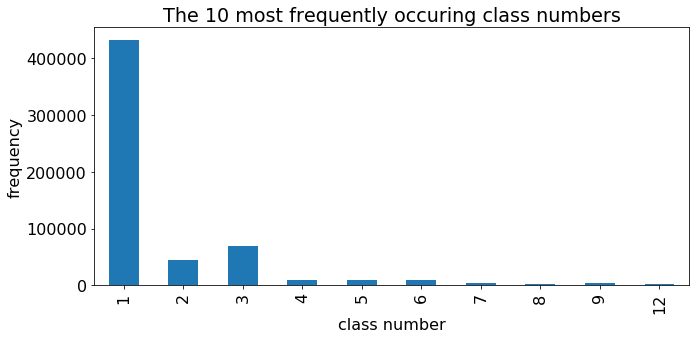

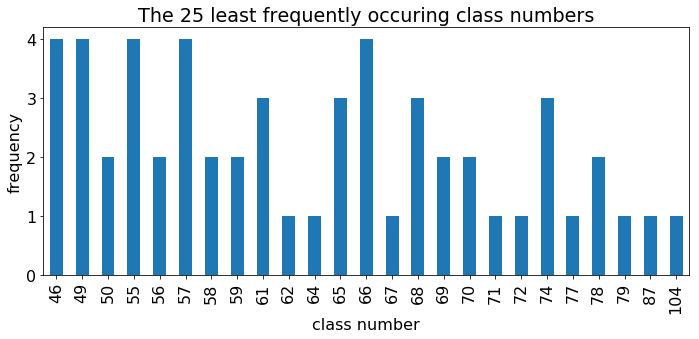

In [11]:
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16

# display 10 most occuring class numbers
pd.value_counts(TM_data['class number'].values).nlargest(10).sort_index().plot(kind='bar', figsize=(10,5))
plt.title('The 10 most frequently occuring class numbers')
plt.xlabel('class number')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

# display 25 least occuring class numbers
pd.value_counts(TM_data['class number'].values).nsmallest(25).sort_index().plot(kind='bar', figsize=(10,5))
plt.title('The 25 least frequently occuring class numbers')
plt.xlabel('class number')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()


## Distribution of class numbers

This next graph is perhaps not that helpful, but illustrates how the class number may change over $N$

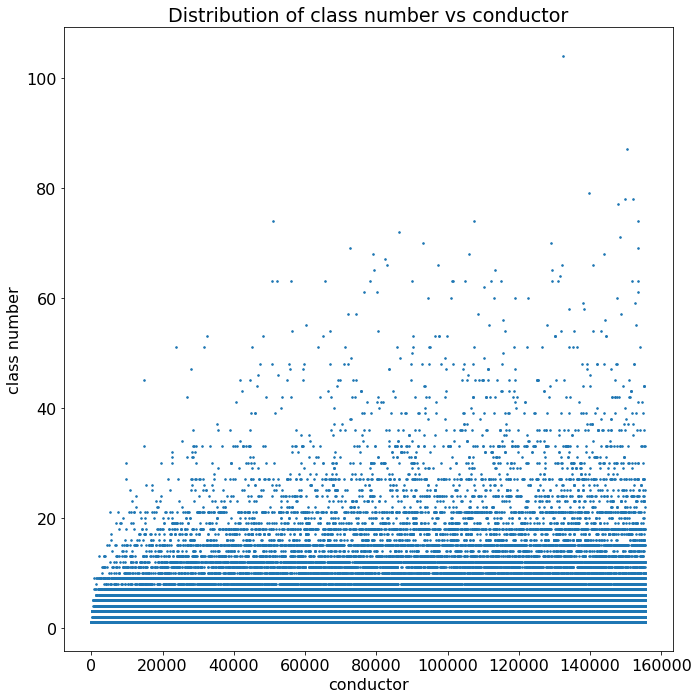

In [12]:
# class number vs N
plt.figure(figsize=(10,10))
plt.scatter(TM_data['N'], TM_data['class number'], s=2.5)
plt.xlabel('conductor')
plt.ylabel('class number')
plt.title('Distribution of class number vs conductor')
plt.tight_layout()
plt.show()

Recall that a single conductor may have multiple forms corresponding to it, each with a potentially different class number. We now take the mean class number over each value of N.

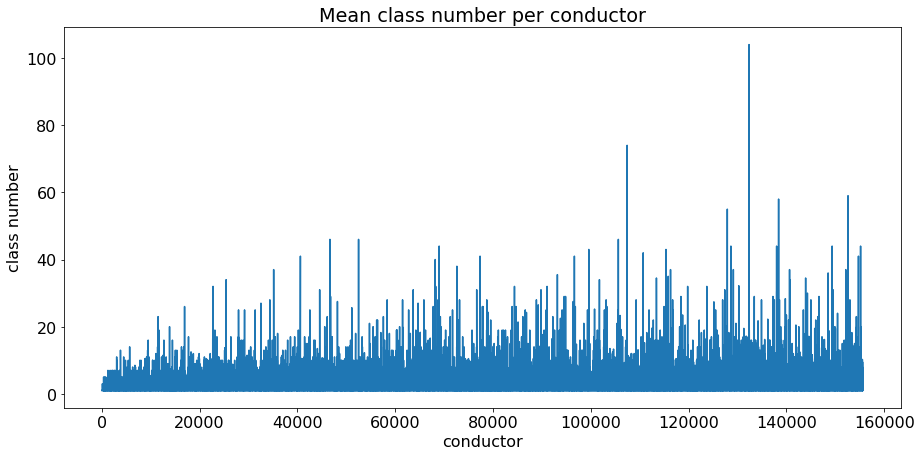

In [32]:
fig, ax = plt.subplots(1,1,figsize=(15,7))

# graph the mean class number over N
ax.plot(TM_data_mean['N'], TM_data_mean['class number'].values)
ax.set_xlabel('conductor')
ax.set_ylabel('class number')
ax.set_title('Mean class number per conductor')
plt.show()

Consider now the rolling mean, standard deviation over every 2500 forms.

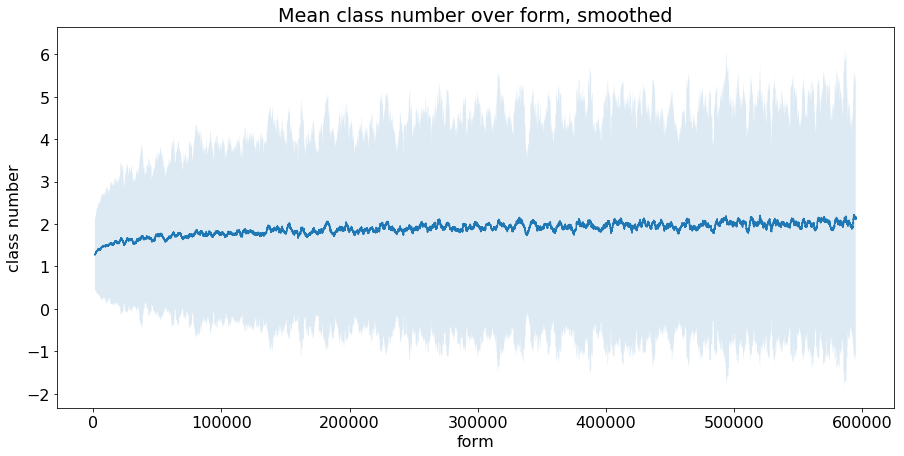

In [26]:
fig, ax = plt.subplots(1,1,figsize=(15,7))

# graph the standard deviation of the class number
ax.fill_between(
    TM_data_rolling_std.index, 
    TM_data_rolling_mean['class number'] - TM_data_rolling_std['class number'], 
    TM_data_rolling_mean['class number'] + TM_data_rolling_std['class number'],
    alpha=.15,
)

# graph the mean class number over N
ax.plot(TM_data_rolling_mean.index, TM_data_rolling_mean['class number'].values)
ax.set_xlabel('form')
ax.set_ylabel('class number')
ax.set_title('Mean class number over form, smoothed')
plt.show()

## Average time to generate the class group

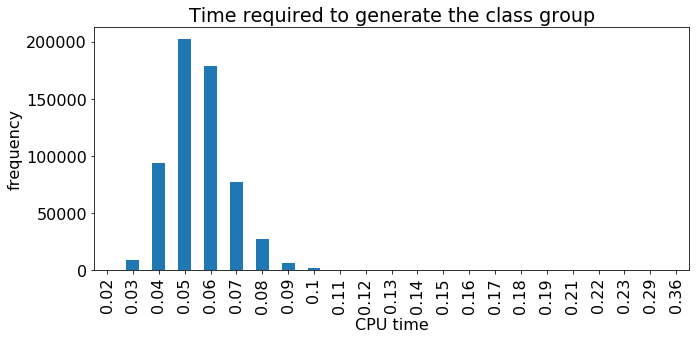

In [27]:
# CPU class group time vs frequency
pd.value_counts(TM_data['class group time'].values).sort_index().plot(kind='bar', figsize=(10,5))
plt.title('Time required to generate the class group')
plt.xlabel('CPU time')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()


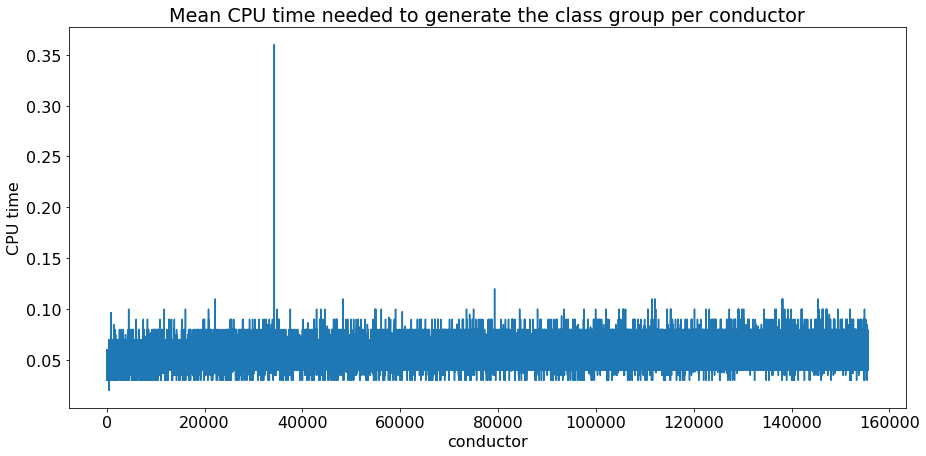

In [31]:
fig, ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(TM_data_mean['N'], TM_data_mean['class group time'].values)
ax.set_title('Mean CPU time needed to generate the class group per conductor')
ax.set(xlabel='conductor', ylabel='CPU time')
plt.show()

# Fundamental units

Here, we attempt to answer the following questions about the fundamental units:
* What percentage of the data has $r = 1$ vs $r = 2$?

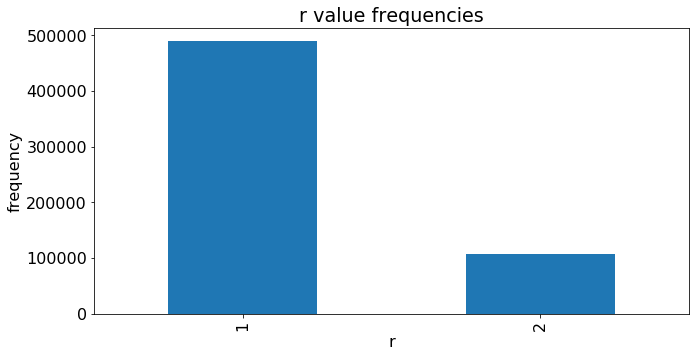

In [33]:
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16

pd.value_counts(TM_data['r'].values).plot(kind='bar', figsize=(10,5))
plt.xlabel('r')
plt.ylabel('frequency')
plt.tight_layout()
plt.title('r value frequencies')
plt.show()


# S-unit rank

In this section, we look at S-unit ranks and try to answer:
* How many S-unit equations must be solved?
* Which rank number occurs the most frequently?
* What is the distribution of rank vs conductor?
* How many S-unit equations does each Thue-Mahler form lead to, on average?
* How long does the average S-unit equation take to generate?
* Does computation time of S-unit equations increase with the conductor, $N$?
* What is the most time-consuming part of generating an S-unit equation?

In [34]:
print('Total number of S-unit equations to solve:', (TM_data['S-unit ranks'].map(len)).sum())

Total number of S-unit equations to solve: 7624573


In [50]:
# generate a new dataframe TM_data_rank by expanding dataframe TM_data for each S-unit equation
TM_data_explode = explode(TM_data, 'S-unit ranks',preserve_index = False)
data = {'N': TM_data_explode['N'], 'S-unit ranks': TM_data_explode['S-unit ranks'] }
TM_data_rank = pd.DataFrame(data, columns = ['N','S-unit ranks'])

TM_data_rank.columns = ['N', 'S-unit rank']
display(TM_data_rank.describe())

,N,S-unit rank
count,7624573.00,7624573.00
mean,88594.38,2.90
std,42017.76,0.86
min,11.00,2.00
25%,54694.00,2.00
50%,92025.00,3.00
75%,124929.00,3.00
max,155591.00,8.00


## Overview of S-unit rank frequency

The following graph shows us which S-unit rank occurs the most frequently overall.

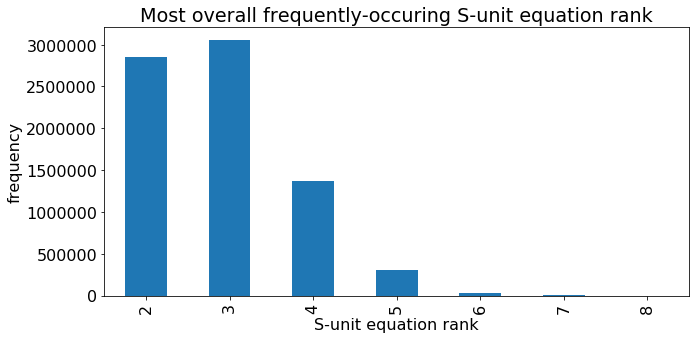

In [36]:
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16

# graph the frequency of each rank
pd.value_counts(TM_data_rank['S-unit rank'].values).sort_index().plot(kind='bar', figsize=(10,5))
plt.title('Most overall frequently-occuring S-unit equation rank')
plt.xlabel('S-unit equation rank')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()


## Number of S-unit equations

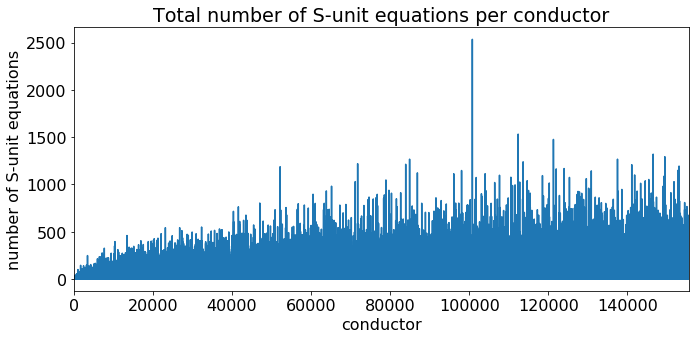

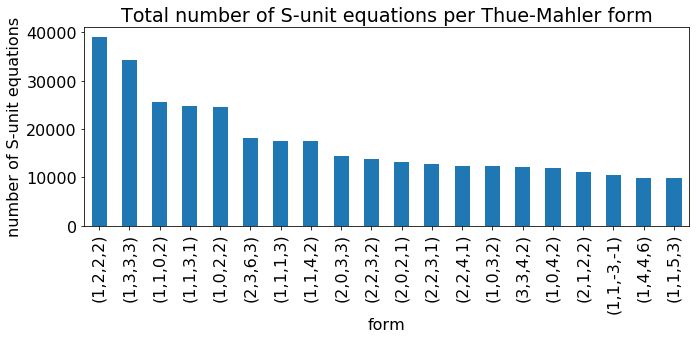

In [42]:
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16

# graph the frequency of each rank per N
TM_data.groupby('N')['no S-unit eq'].sum().plot(figsize=(10,5))
plt.title('Total number of S-unit equations per conductor')
plt.xlabel('conductor')
plt.ylabel('number of S-unit equations')
plt.tight_layout()
plt.show()

# graph the frequency of each rank per form
TM_data.groupby('form')['no S-unit eq'].sum().nlargest(20).plot(kind='bar',figsize=(10,5))
plt.title('Total number of S-unit equations per Thue-Mahler form')
plt.xlabel('form')
plt.ylabel('number of S-unit equations')
plt.tight_layout()
plt.show()


In the following, we take the mean total number of S-unit equations over all forms sharing the same conductor.

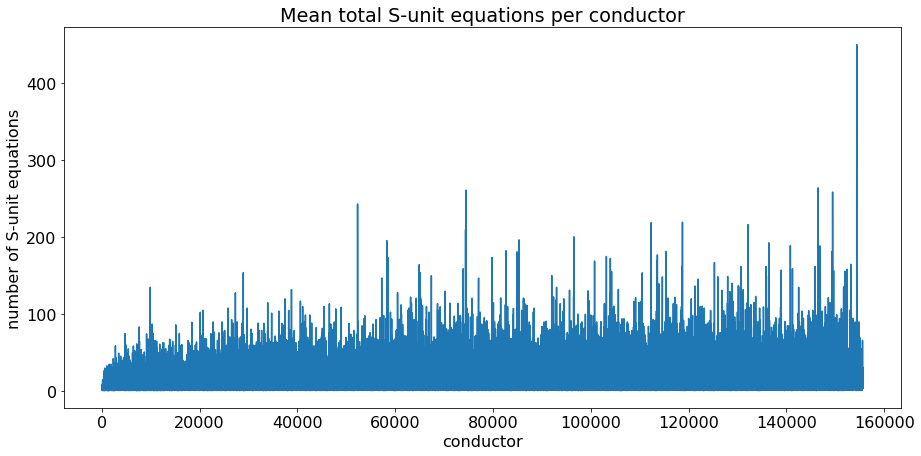

In [45]:
fig, ax = plt.subplots(1,1,figsize=(15,7))

# graph the mean number of S-unit equations over N
ax.plot(TM_data_mean['N'], TM_data_mean['no S-unit eq'].values)
ax.set_xlabel('conductor')
ax.set_ylabel('number of S-unit equations')
ax.set_title('Mean total S-unit equations per conductor')
plt.show()

In [51]:
# generate a new dataframe TM_data_rank2 by grouping TM_data_rank by (N,rank) pair
# this dataframe lists N, rank, frequency of rank
TM_data_rank2 = (
    TM_data_rank.groupby(['N','S-unit rank'])
    .N.count()
    .rename('frequency')
    .reset_index()
)

# generate a new dataframe TM_data_rank3 by grouping TM_data by N, listing total number of S-unit eq
TM_data_rank3 = (
    TM_data.groupby('N')['no S-unit eq']
    .sum()
    .rename('total S-unit eq')
    .reset_index()
)

# conductor yielding largest number of S-unit equations
print('The conductor yielding the most S-unit equations: ')
display(TM_data_rank3.loc[TM_data_rank3['total S-unit eq'] == TM_data_rank3['total S-unit eq'].max()])

# conductor yielding largest number of S-unit equations of given rank
print('The conductor yielding the most S-unit equations of a given rank: ')
display(TM_data_rank2.loc[TM_data_rank2['frequency'] == TM_data_rank2['frequency'].max()])

# form yielding most S-unit equations
print('The TM form yielding the total most S-unit equations:')
display(TM_data[['N','form','no S-unit eq']].loc[TM_data['no S-unit eq'] == TM_data['no S-unit eq'].max()])

The conductor yielding the most S-unit equations: 


,N,total S-unit eq
87114,100775,2535


The conductor yielding the most S-unit equations of a given rank: 


,N,S-unit rank,frequency
237641,100775,2,1521


The TM form yielding the total most S-unit equations:


,N,form,no S-unit eq
570805,149447,"(6,1,26,15)",924


## Distribution of ranks

The following graph displays which S-unit equation rank occurs most frequently per conductor. That is, we plot the number of rank $n$ S-unit equations per conductor, whereas perviously we plotted the overall number of rank $n$ S-unit equations. 

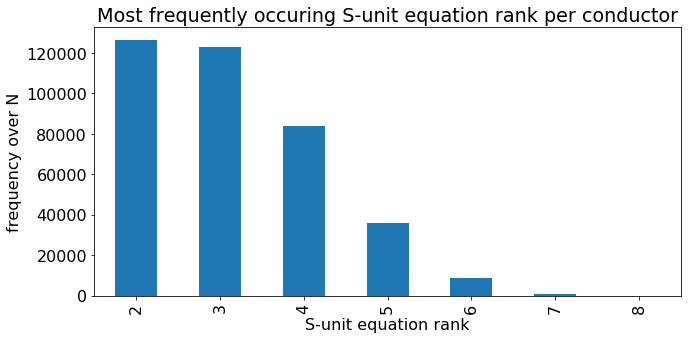

In [58]:
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16

# graph the frequency of each rank
pd.value_counts(TM_data_rank2['S-unit rank'].values).sort_index().plot(kind='bar', figsize=(10,5))
plt.title('Most frequently occuring S-unit equation rank per conductor')
plt.xlabel('S-unit equation rank')
plt.ylabel('frequency over N')
plt.tight_layout()
plt.show()

We now setup to compute the total number of rank $n$ S-unit equations per conductor, and display the results in the 8 graphs below.

In [108]:
# generate a new dataframe TM_data_rank_byn by grouping TM_data_rank by (N,rank n, frequency), for each n
# this dataframe lists N, rank n, frequency of rank
TM_data_rank_by2 = (
    TM_data_rank2.groupby(['S-unit rank'])
    .get_group(2)
    .set_index('N')
)
TM_data_rank_by3 = (
    TM_data_rank2.groupby(['S-unit rank'])
    .get_group(3)
    .set_index('N')
)
TM_data_rank_by4 = (
    TM_data_rank2.groupby(['S-unit rank'])
    .get_group(4)
    .set_index('N')
)
TM_data_rank_by5 = (
    TM_data_rank2.groupby(['S-unit rank'])
    .get_group(5)
    .set_index('N')
)
TM_data_rank_by6 = (
    TM_data_rank2.groupby(['S-unit rank'])
    .get_group(6)
    .set_index('N')
)
TM_data_rank_by7 = (
    TM_data_rank2.groupby(['S-unit rank'])
    .get_group(7)
    .set_index('N')
)
TM_data_rank_by8 = (
    TM_data_rank2.groupby(['S-unit rank'])
    .get_group(8)
    .set_index('N')
)


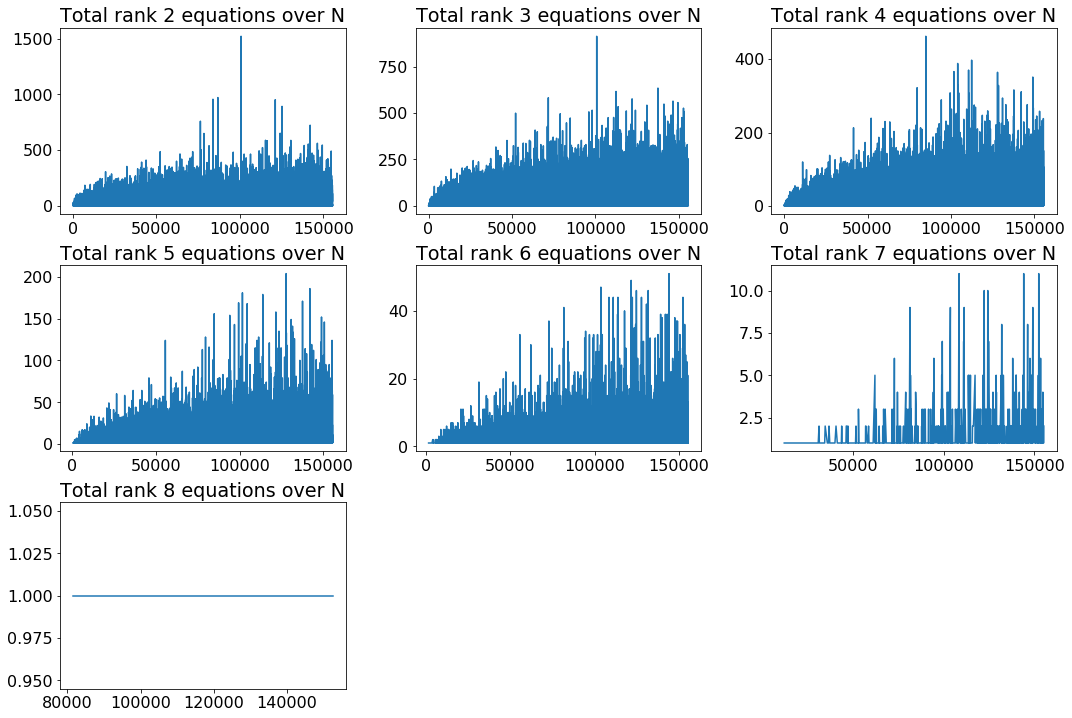

In [131]:
fig, axs = plt.subplots(3, 3,figsize=(15,10))

axs[0, 0].plot(TM_data_rank_by2.index, TM_data_rank_by2['frequency'])
axs[0, 0].set_title('Total rank 2 equations over N')
axs[0, 1].plot(TM_data_rank_by3.index, TM_data_rank_by3['frequency'])
axs[0, 1].set_title('Total rank 3 equations over N')
axs[0, 2].plot(TM_data_rank_by4.index, TM_data_rank_by4['frequency'])
axs[0, 2].set_title('Total rank 4 equations over N')
axs[1, 0].plot(TM_data_rank_by5.index, TM_data_rank_by5['frequency'])
axs[1, 0].set_title('Total rank 5 equations over N')
axs[1, 1].plot(TM_data_rank_by6.index, TM_data_rank_by6['frequency'])
axs[1, 1].set_title('Total rank 6 equations over N')
axs[1, 2].plot(TM_data_rank_by7.index, TM_data_rank_by7['frequency'])
axs[1, 2].set_title('Total rank 7 equations over N')
axs[2, 0].plot(TM_data_rank_by8.index, TM_data_rank_by8['frequency'])
axs[2, 0].set_title('Total rank 8 equations over N')

fig.tight_layout(pad=0.5)
fig.delaxes(axs[2, 1])
fig.delaxes(axs[2, 2])
plt.show()

## Average time to generate S-unit equations

This first graph illustrates the total CPU time required to generate all S-unit equations over $N$.

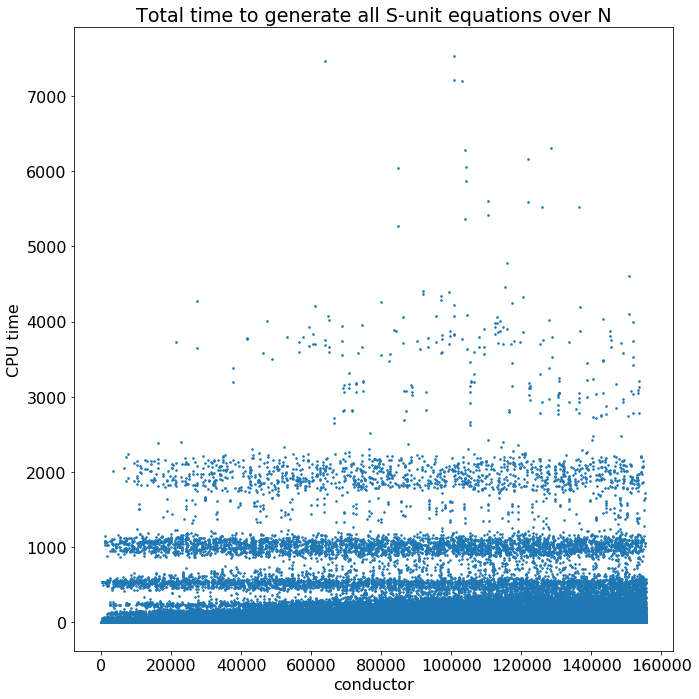

In [132]:
# total time to generate S-unit equations vs N
plt.figure(figsize=(10,10))
plt.scatter(TM_data['N'], TM_data['total time'], s=2.5)
plt.xlabel('conductor')
plt.ylabel('CPU time')
plt.title('Total time to generate all S-unit equations over N')
plt.tight_layout()
plt.show()


To make more sense of this graph, we isolate the time required to generate an optimal $GL_2(\mathbb{Z})$ action.

In [133]:
TM_data['total time excluding GL2Z'] = TM_data['total time'] - TM_data['GL2Z action time']
display(TM_data[['N','GL2Z action time','total time','total time excluding GL2Z']].describe())

,N,GL2Z action time,total time,total time excluding GL2Z
count,596348.00,596348.00,596348.00,596348.00
mean,83663.56,29.07,31.05,1.97
std,43440.37,147.44,148.59,5.18
min,11.00,0.26,0.50,0.14
25%,47348.00,3.08,3.76,0.45
50%,85608.00,5.56,6.37,0.83
75%,121338.00,11.70,13.02,1.38
max,155591.00,7530.38,7533.75,861.67


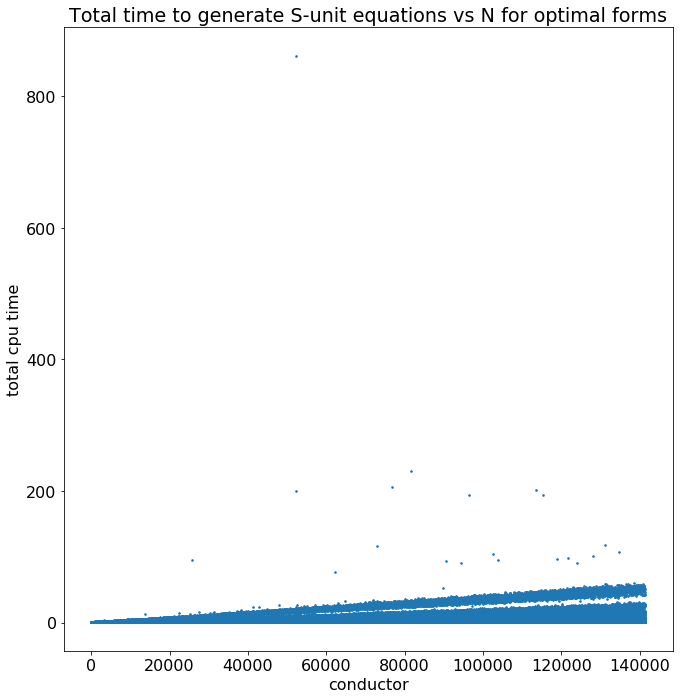

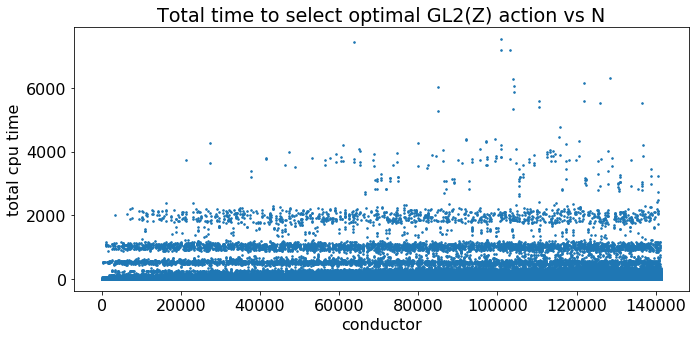

In [130]:
# total time to generate S-unit equations vs N for optimal forms
plt.figure(figsize=(10,10))
plt.scatter(TM_data['N'], TM_data['total time excluding GL2Z'], s=2.5)
plt.xlabel('conductor')
plt.ylabel('total cpu time')
plt.title('Total time to generate S-unit equations vs N for optimal forms')
plt.tight_layout()
plt.show()

# total time to select optimal GL2(Z) action vs N
plt.figure(figsize=(10,5))
plt.scatter(TM_data['N'], TM_data['GL2Z action time'], s=2.5)
plt.xlabel('conductor')
plt.ylabel('total cpu time')
plt.title('Total time to select optimal GL2(Z) action vs N')
plt.tight_layout()
plt.show()

Again, these graphs are not overly telling, so we take a rolling average over every 2500 entries to obtain the following graphs.

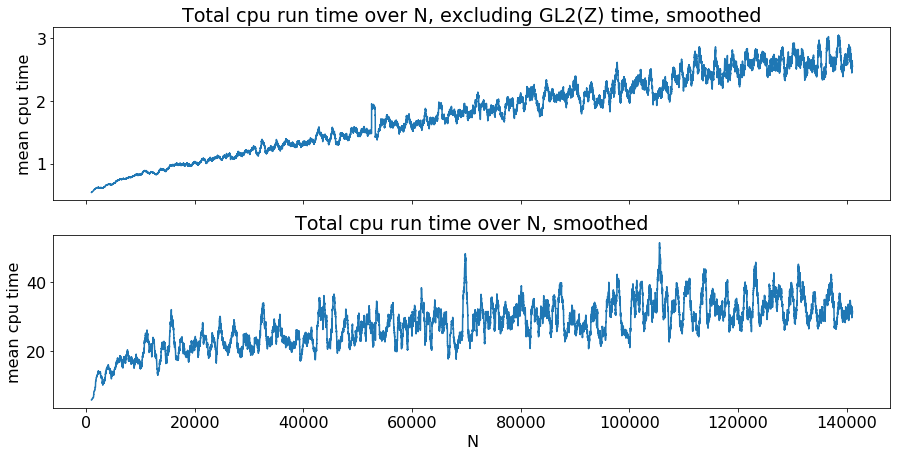

In [187]:
fig, ax = plt.subplots(2,1,figsize=(15,7))
ax[0].plot(TM_data_rolling_mean['N'], TM_data_rolling_mean['total time excluding GL2Z'].values)
ax[0].set_title('Total cpu run time over N, excluding GL2(Z) time, smoothed')
ax[1].plot(TM_data_rolling_mean['N'], TM_data_rolling_mean['GL2Z action time'].values)
ax[1].set_title('Total cpu run time over N, smoothed')

for aa in ax.flat:
    aa.set(xlabel='N', ylabel='mean cpu time')

# hide x labels and tick labels for top plot
for aa in ax.flat:
    aa.label_outer()

The following graph illustrates all of the CPU run times required to generate the S-unit equations for each form, broken down by operation. Note here that we do not run over $N$, but rather over each form. 

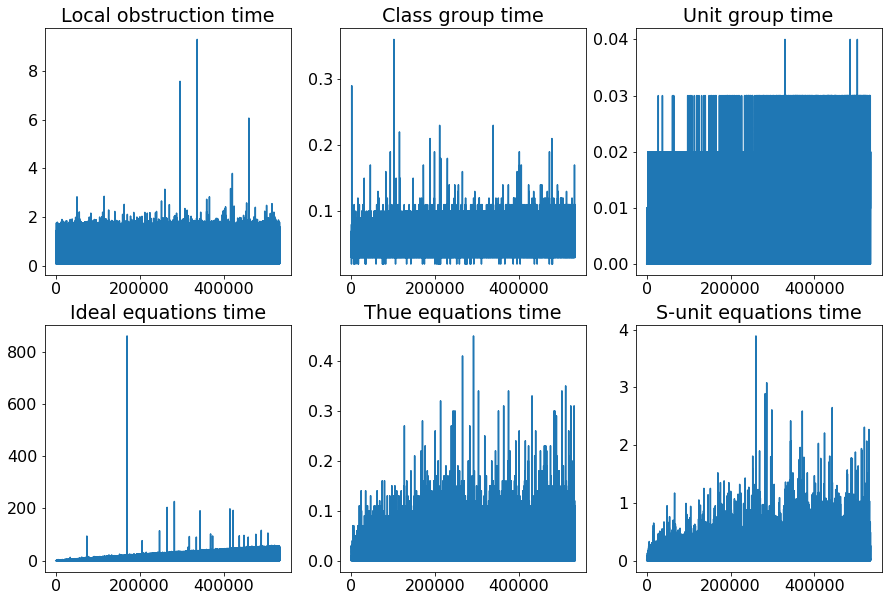

In [200]:
fig, axs = plt.subplots(2, 3,figsize=(15,10))

axs[0, 0].plot(TM_data.index, TM_data['local obstruction time'])
axs[0, 0].set_title('Local obstruction time')
axs[0, 1].plot(TM_data.index, TM_data['class group time'])
axs[0, 1].set_title('Class group time')
axs[0, 2].plot(TM_data.index, TM_data['unit group time'])
axs[0, 2].set_title('Unit group time')
axs[1, 0].plot(TM_data.index, TM_data['ideal eq time'])
axs[1, 0].set_title('Ideal equations time')
axs[1, 1].plot(TM_data.index, TM_data['Thue eq time'])
axs[1, 1].set_title('Thue equations time')
axs[1, 2].plot(TM_data.index, TM_data['S-unit time'])
axs[1, 2].set_title('S-unit equations time')

for axs in axs.flat:
    ax.set(xlabel='form', ylabel='CPU time')

plt.show()

In [ ]:

# CPU S-unit time vs frequency

# generate a list of all columns from TM_data, choosing only 
col_list= list(TM_data)
col_list
col_list.remove('')
col_list
Out[98]:
['a', 'b', 'c']
In [99]:

df['e'] = df[col_list].sum(axis=1)
df